In [32]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
df = pd.read_csv('./datasets/SMSSpamCollection', sep='\t', header=None)
df.columns = ['target', 'text']

In [34]:
print(df)

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [35]:
df['target'] = df['target'].apply(lambda x: 1 if x == 'spam' else 0)

In [36]:
df.target.value_counts(normalize=True)

target
0    0.865937
1    0.134063
Name: proportion, dtype: float64

#### Treinar modelo

In [37]:
X = df['text']
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [39]:
model = RandomForestClassifier()

model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(X_test_tfidf)

In [41]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
y_proba = model.predict_proba(X_test_tfidf)

In [43]:
y_proba

array([[0.99, 0.01],
       [0.85, 0.15],
       [0.98, 0.02],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.97, 0.03]])

In [44]:
#Isolando apenas a probabilidade da classe positiva (ex: é spam)
y_proba_1 = y_proba[:,1]

In [45]:
y_proba_1

array([0.01, 0.15, 0.02, ..., 0.01, 0.01, 0.03])

In [46]:
df_count = y_test.count() + y_train.count()

array([[<Axes: title={'center': '0'}>]], dtype=object)

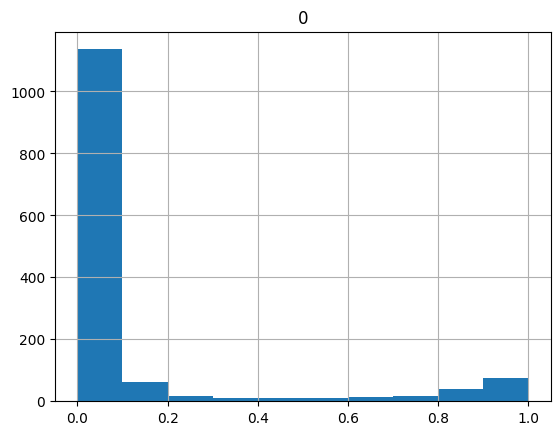

In [47]:
# Histograma, considerando a parte de teste, com a saída das probabilidades da classe positiva (1), ex: é spam
pd.DataFrame(y_proba_1).hist(bins = 10)

# total da coluna / total de tudo
# mudar a escala da contagem

In [48]:
# Gerar o histograma e capturar os bins e as contagens
y_proba_count, bin_edges = np.histogram(y_proba_1, bins=10)

In [49]:
y_proba_count

array([1136,   63,   17,   10,   12,   11,   14,   17,   39,   74])

In [50]:
y_proba_percentage = (y_proba_count / (y_proba_count.sum())) * 100

In [51]:
y_proba_percentage

array([81.55061019,  4.52261307,  1.22038765,  0.71787509,  0.86145011,
        0.7896626 ,  1.00502513,  1.22038765,  2.79971285,  5.31227566])

In [52]:
df_results = pd.DataFrame({
  'y_proba_1': y_proba_1, # probabiliadde positiva
  'y_test': y_test
})

In [53]:
df_results_filtered = df_results[df_results['y_test'] == 1]

<Axes: >

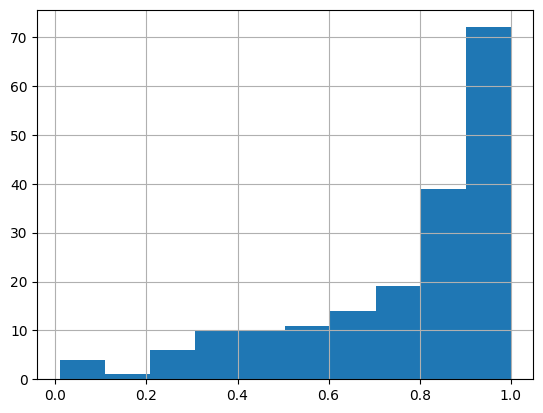

In [54]:
df_results_filtered['y_proba_1'].hist(bins=10)
# Quando a probabilidade é muito baixa, possivelmente o modelo errou
# No meio ele não acerta muito bem
# A maioria que a gente sabe que 

In [55]:
# Gerar o histograma e capturar os bins e as contagens
y_proba_1_filtered = df_results_filtered['y_proba_1']

y_proba_1_filtered_count, bin_edges = np.histogram(y_proba_1_filtered, bins=10)

In [56]:
y_proba_1_filtered_count

array([ 4,  1,  6, 10, 10, 11, 14, 19, 39, 72])

In [57]:
y_proba_filtered_percentage = (y_proba_1_filtered_count / (y_proba_1_filtered_count.sum())) * 100

In [58]:
y_proba_filtered_percentage

array([ 2.15053763,  0.53763441,  3.22580645,  5.37634409,  5.37634409,
        5.91397849,  7.52688172, 10.21505376, 20.96774194, 38.70967742])

In [59]:
df_melt = pd.DataFrame({
  'filtered_proba': y_proba_filtered_percentage, # probabiliadde positiva
  'proba': y_proba_percentage
})

In [60]:
df_melt

,filtered_proba,proba
0,2.150538,81.550610
1,0.537634,4.522613
2,3.225806,1.220388
3,5.376344,0.717875
4,5.376344,0.861450
5,5.913978,0.789663
6,7.526882,1.005025
7,10.215054,1.220388
8,20.967742,2.799713
9,38.709677,5.312276


/tmp/ipykernel_389220/174527406.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(percentages)


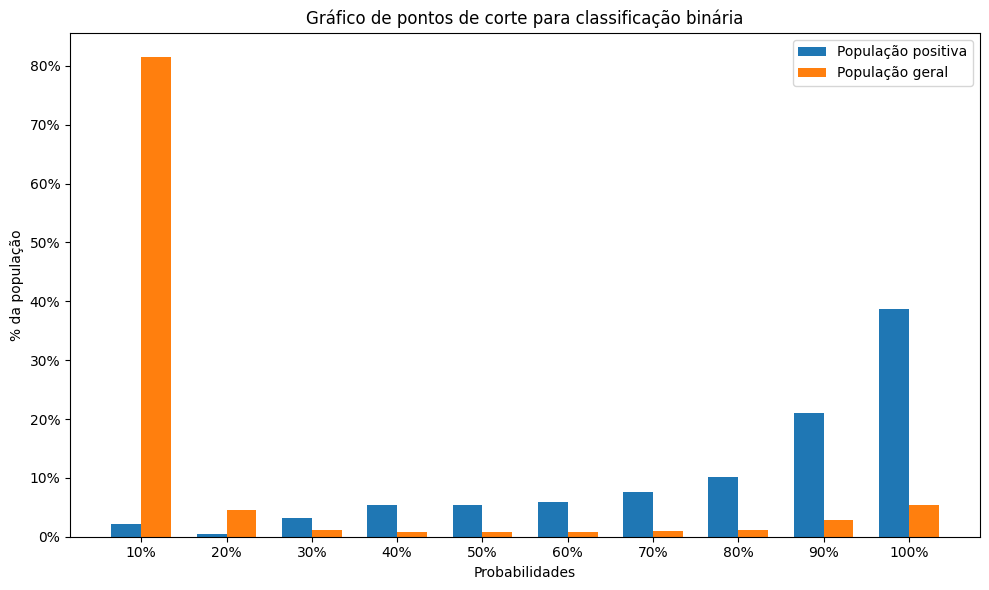

In [71]:
# Definindo o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Definindo a largura das barras
bar_width = 0.35
index = range(len(df_melt))

# Plotando as barras lado a lado
ax.bar(index, df_melt['filtered_proba'], bar_width, label='População positiva')
ax.bar([i + bar_width for i in index], df_melt['proba'], bar_width, label='População geral')

# Adicionando os detalhes do gráfico
ax.set_xlabel('Probabilidades')
ax.set_ylabel('% da população')
ax.set_title('Gráfico de pontos de corte para classificação binária')

# Adicionando o eixo x em porcentagem
percentages = ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_yticklabels(percentages)

percentages = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(percentages)
# ax.set_yticklabels(percentages)

# Exibindo o gráfico
ax.legend()
plt.tight_layout()
plt.show()